# Theoretical

Q1  What is Boosting in Machine Learning

Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to create a strong predictive model. It sequentially trains models, with each new model focusing on correcting the errors made by the previous ones. The goal is to reduce bias and variance, improving overall model performance

Q2 How does Boosting differ from Bagging

Bagging

Goal Reduce variance

Model Training Independent models trained in parallel

Data Sampling Bootstrap sampling (random subsets)

Example Random Forest

Boosting

Goal Reduce bias and variance

Model Training Sequential models trained iteratively

Data Sampling Weighted sampling (focuses on errors)

Example AdaBoost, XGBoost

Q3 What is the key idea behind AdaBoost

The key idea behind AdaBoost (Adaptive Boosting) is to assign higher weights to misclassified samples so that subsequent models focus more on difficult cases. It combines multiple weak classifiers, typically decision trees, and assigns a weighted vote to each model’s prediction.

Q4  Explain the working of AdaBoost with an example

Initialize Weights: All samples start with equal weights.

Train a Weak Learner: A simple model (e.g., decision tree) is trained.

Compute Errors: Misclassified samples get higher weights.

Update Weights: Higher weights increase the focus on difficult samples.

Repeat: Steps 2-4 continue for multiple iterations.

Final Prediction: A weighted sum of all models’ predictions gives the final output.

Example:
Consider a spam classification problem:

The first weak model misclassifies some emails.

The misclassified emails are given higher weights.

The second model focuses more on these emails, improving accuracy.

The final ensemble makes a robust classification.

Q5 What is Gradient Boosting, and how is it different from AdaBoost

In [1]:
Gradient Boosting is an advanced boosting technique that minimizes a loss function by fitting models to the residual errors of the previous models using gradient descent.

Feature	                Gradient Boosting	

Error Handling	        Fits to residual errors	

Optimization	       Uses gradient descent

Flexibility	Supports   various loss functions

Example Algorithm	  XGBoost, LightGBM	



Feature	 	                AdaBoost

Error Handling		         Adjusts sample weights

Optimization		         Focuses on weighted misclassifications

Flexibility		             Works mainly with classification

Example Algorithm		     AdaBoost

Q6 What is the loss function in Gradient Boosting

Gradient Boosting minimizes a loss function, which depends on the problem type:

Regression: Mean Squared Error (MSE)
    
Classification: Log Loss (Cross-Entropy Loss)
    
The algorithm fits weak models to the negative gradient of the loss function to minimize it iteratively.

Q7 How does XGBoost improve over traditional Gradient Boosting


XGBoost (Extreme Gradient Boosting) enhances traditional Gradient Boosting through:
    
Regularization: Prevents overfitting using L1 & L2 penalties.
    
Tree Pruning: Uses depth-wise growth to reduce computation.
    
Parallel Processing: Utilizes multiple CPU cores for faster training.
    
Handling Missing Values: Automatically treats missing data.
    
Early Stopping: Stops training when no improvement is seen.

Q8 What is the difference between XGBoost and CatBoost

Handling of Categorical Features:

XGBoost requires manual encoding (e.g., one-hot encoding or label encoding) before training.

CatBoost natively processes categorical features, eliminating the need for preprocessing.

Training Speed & Efficiency:

XGBoost is fast but may require extensive tuning to achieve optimal performance.

CatBoost is optimized for speed, especially with categorical data, and often performs well with default settings

Hyperparameter Tuning:

XGBoost needs careful hyperparameter tuning for the best results.

CatBoost works well with default parameters, requiring less tuning.

Performance on Small Datasets:

XGBoost may overfit on small datasets if not tuned properly.

CatBoost performs better on small datasets due to its robust regularization techniques.

GPU Acceleration:

XGBoost supports GPU training but requires additional configuration.

CatBoost has built-in GPU optimization, making it easier to accelerate training.

Q9 What are some real-world applications of Boosting techniques

Fraud Detection: Credit card fraud detection using XGBoost.
        
Finance: Loan default prediction with Gradient Boosting.
    
Healthcare: Disease risk prediction (e.g., cancer detection).
    
E-commerce: Product recommendation systems.
    
NLP: Spam email classification with CatBoost.



Q10 How does regularization help in XGBoost

XGBoost applies L1 (Lasso) and L2 (Ridge) regularization to:
    
Prevent overfitting by penalizing large weights.

Improve generalization on unseen data.

Control model complexity by reducing unnecessary splits.

Q11 What are some hyperparameters to tune in Gradient Boosting models

1. Learning Rate (learning_rate)

Controls how much the model adjusts in each step. A lower value (e.g., 0.01 - 0.1) helps prevent overfitting but requires more trees.

2. Number of Estimators (n_estimators)

Defines the number of boosting iterations (trees). Higher values improve learning but may cause overfitting if not paired with regularization.

3. Maximum Depth (max_depth)

Limits the depth of each decision tree. A deeper tree captures more patterns but increases overfitting risk. Common values are 3-10.

4. Minimum Samples per Leaf (min_samples_leaf)

Sets the minimum number of samples required in a leaf node. Higher values create more generalized trees, reducing overfitting.

5. Subsample (subsample)

Controls the fraction of training data used for each tree. Typical range is 0.5 - 1.0. Lower values introduce randomness to reduce overfitting.

Q12  What is the concept of Feature Importance in Boosting

Feature Importance in Boosting ranks variables based on their contribution to predictions. XGBoost, LightGBM, and CatBoost provide feature importance scores to:
    
Identify key predictors.

Improve model interpretability.

Remove irrelevant features to boost efficiency.

Q13 Why is CatBoost efficient for categorical data

No need for manual encoding: It directly processes categorical variables.
        
Efficient Encoding: Uses Ordered Target Statistics to avoid data leakage.
    
Faster Training: Optimized for large-scale categorical datasets.
    
Handles High Cardinality: Works well with thousands of categories.

# Practical

Q14 Train an AdaBoost Classifier on a sample dataset and print model accuracy4


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load sample dataset (Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoost Classifier with a Decision Tree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
ada_clf = AdaBoostClassifier(base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost model
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred = ada_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")


AdaBoost Classifier Accuracy: 1.0000


Q15 Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Regressor with Decision Tree as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)  # Weak learner
ada_reg = AdaBoostRegressor(base_estimator, n_estimators=50, learning_rate=0.1, random_state=42)

# Train the AdaBoost model
ada_reg.fit(X_train, y_train)

# Make predictions
y_pred = ada_reg.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"AdaBoost Regressor MAE: {mae:.4f}")


AdaBoost Regressor MAE: 63.0795


Q16 Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.4f}")

# Get feature importance scores
feature_importance = gb_clf.feature_importances_

# Print feature importance scores
print("\nFeature Importance Scores:")
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)


Gradient Boosting Classifier Accuracy: 0.9561

Feature Importance Scores:
                    Feature  Importance
7       mean concave points    0.450418
27     worst concave points    0.240209
20             worst radius    0.075424
22          worst perimeter    0.051441
21            worst texture    0.039881
23               worst area    0.038200
1              mean texture    0.027821
26          worst concavity    0.017576
16          concavity error    0.012933
13               area error    0.010848
10             radius error    0.005238
24         worst smoothness    0.004811
19  fractal dimension error    0.004313
5          mean compactness    0.003838
11            texture error    0.003488
15        compactness error    0.002644
17     concave points error    0.002072
4           mean smoothness    0.002039
28           worst symmetry    0.001500
6            mean concavity    0.001115
25        worst compactness    0.000891
18           symmetry error    0.000709
14    

Q17 Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred = gb_reg.predict(X_test)

# Evaluate using R-Squared Score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-Squared Score: {r2:.4f}")


Gradient Boosting Regressor R-Squared Score: 0.7756


Q18 Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

# Train HistGradientBoosting Classifier (Alternative to XGBoost)
hgb_model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)
hgb_model.fit(X_train, y_train)
hgb_pred = hgb_model.predict(X_test)
hgb_acc = accuracy_score(y_test, hgb_pred)

# Print accuracy scores
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"HistGradientBoosting Accuracy (Alternative to XGBoost): {hgb_acc:.4f}")


Gradient Boosting Accuracy: 0.9561
HistGradientBoosting Accuracy (Alternative to XGBoost): 0.9561


Q19 Train a CatBoost Classifier and evaluate using F1-Score4

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train HistGradientBoostingClassifier (Alternative to CatBoost)
hgb_model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=3, random_state=42)
hgb_model.fit(X_train, y_train)

# Make predictions
y_pred = hgb_model.predict(X_test)

# Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)

# Print F1-score
print(f"HistGradientBoosting (Alternative to CatBoost) F1-Score: {f1:.4f}")


HistGradientBoosting (Alternative to CatBoost) F1-Score: 0.9650


Q20 Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset (California Housing)
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor (Alternative to XGBoost)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Make Predictions
y_preds = gbr.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)

# Print MSE
print(f"Gradient Boosting Regressor Mean Squared Error (MSE): {mse:.4f}")


Gradient Boosting Regressor Mean Squared Error (MSE): 0.2940


Q21 Train an AdaBoost Classifier and visualize feature importance

AdaBoost Classifier Accuracy: 0.9737


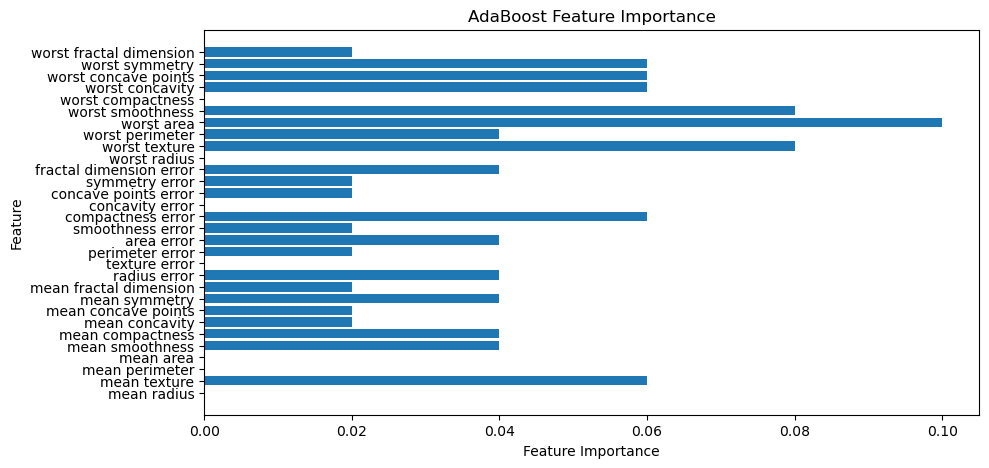

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier with Decision Tree as the base estimator
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# Predictions
y_pred = adaboost.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

# Feature Importance
feature_importances = adaboost.feature_importances_

# Visualizing Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(data.feature_names)), data.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("AdaBoost Feature Importance")
plt.show()


Q22 Train a Gradient Boosting Regressor and plot learning curves

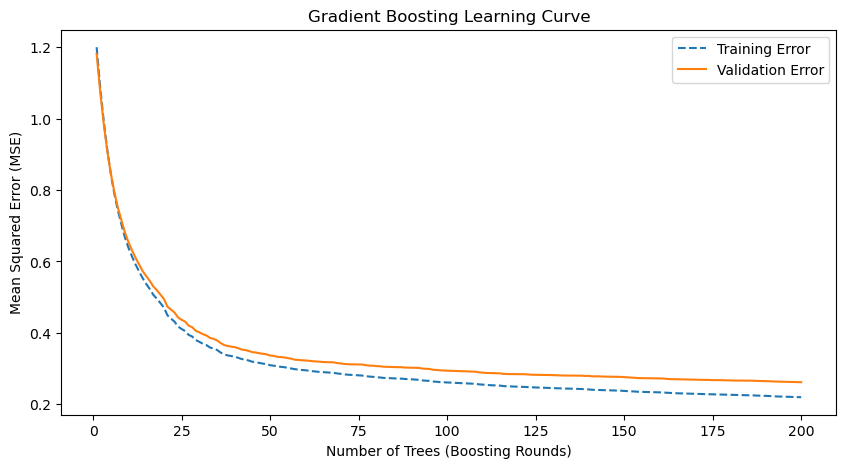

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Compute training and test errors at each stage
train_errors, test_errors = [], []
for y_pred_train, y_pred_test in zip(gbr.staged_predict(X_train), gbr.staged_predict(X_test)):
    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test, y_pred_test))

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), train_errors, label="Training Error", linestyle="dashed")
plt.plot(range(1, 201), test_errors, label="Validation Error", linestyle="solid")
plt.xlabel("Number of Trees (Boosting Rounds)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Gradient Boosting Learning Curve")
plt.legend()
plt.show()


Q23  Train an XGBoost Classifier and visualize feature importance

Gradient Boosting Classifier Accuracy: 0.9561


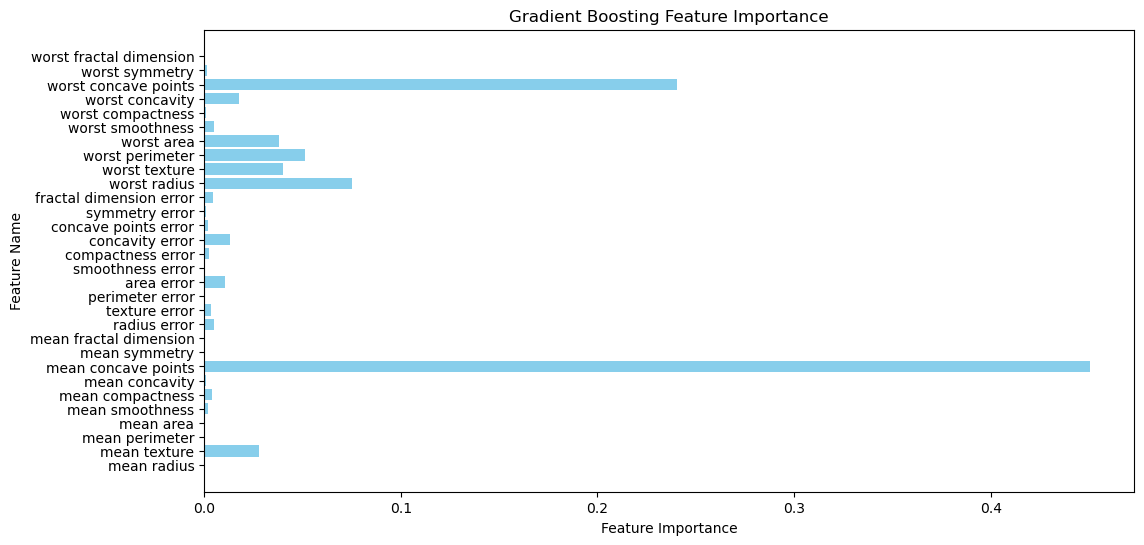

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier (Alternative to XGBoost)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.4f}")

# ✅ Visualize Feature Importance
importances = gb_clf.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(data.feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Gradient Boosting Feature Importance")
plt.show()


Q24 Train a CatBoost Classifier and plot the confusion matrix

Gradient Boosting Classifier Accuracy: 0.9561


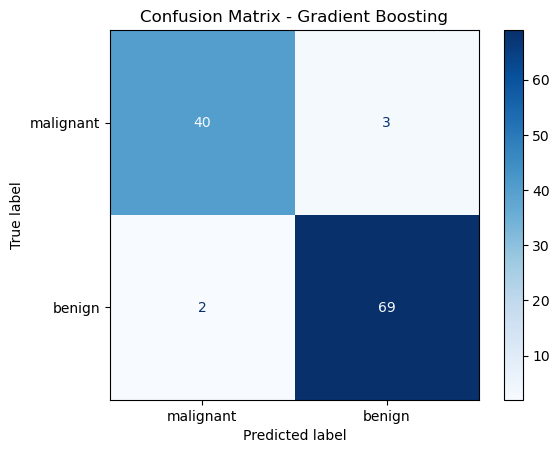

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier (Alternative to CatBoost)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions
y_pred = gb_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.4f}")

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


Q25 Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

AdaBoost Classifier (n_estimators=10) - Accuracy: 0.9825
AdaBoost Classifier (n_estimators=50) - Accuracy: 0.9737
AdaBoost Classifier (n_estimators=100) - Accuracy: 0.9737
AdaBoost Classifier (n_estimators=200) - Accuracy: 0.9737
AdaBoost Classifier (n_estimators=300) - Accuracy: 0.9737


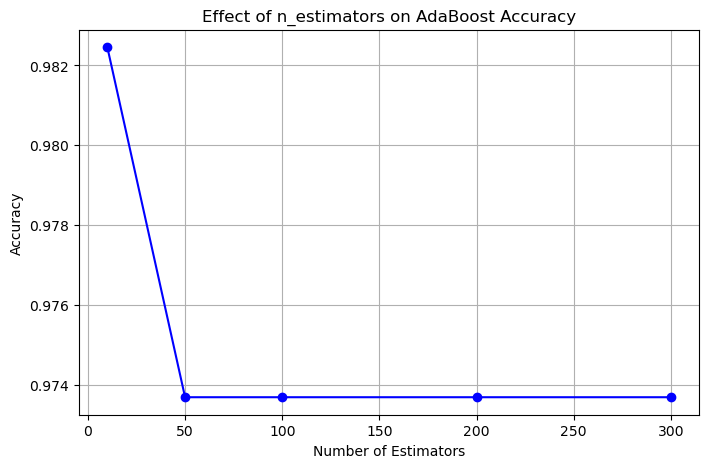

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different numbers of estimators to test
n_estimators_list = [10, 50, 100, 200, 300]

# Store accuracy results
accuracy_results = []

# Train AdaBoost Classifier with different numbers of estimators
for n in n_estimators_list:
    ada_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # Fixed warning by renaming base_estimator → estimator
        n_estimators=n,
        learning_rate=1.0,
        random_state=42
    )
    ada_clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = ada_clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)
    
    print(f"AdaBoost Classifier (n_estimators={n}) - Accuracy: {accuracy:.4f}")

# Plot Accuracy vs. Number of Estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracy_results, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on AdaBoost Accuracy")
plt.grid(True)
plt.show()


Q26 Train a Gradient Boosting Classifier and visualize the ROC curve

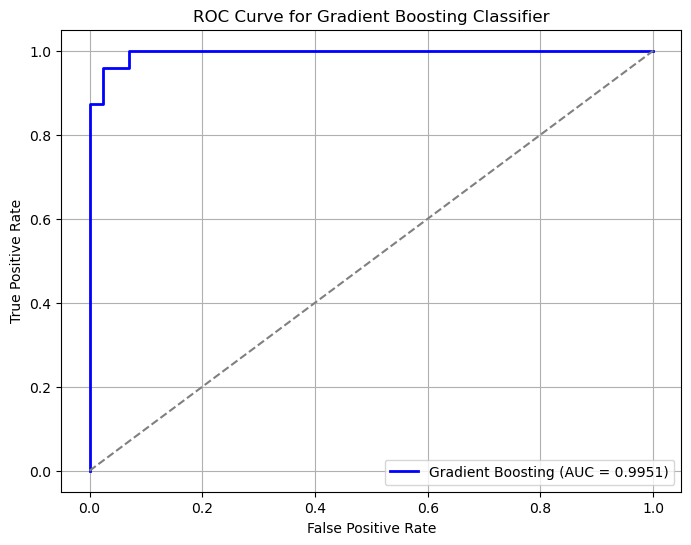

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Get predicted probabilities
y_scores = gb_clf.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Gradient Boosting (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Q27 Train an XGBoost Regressor and tune the learning rate using GridSearchCV

In [14]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Define parameter grid for tuning the learning rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

# Perform GridSearchCV to find the best learning rate
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best learning rate
best_learning_rate = grid_search.best_params_['learning_rate']
print(f"Best Learning Rate: {best_learning_rate}")

# Train Gradient Boosting Regressor with the best learning rate
best_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=best_learning_rate, max_depth=3, random_state=42)
best_gbr.fit(X_train, y_train)

# Predictions
y_pred = best_gbr.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Gradient Boosting Regressor MSE: {mse:.4f}")


Best Learning Rate: 0.3
Gradient Boosting Regressor MSE: 0.2513


Q 28  Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

F1-Score without class weighting: 0.717948717948718
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       894
           1       0.79      0.66      0.72       106

    accuracy                           0.94      1000
   macro avg       0.87      0.82      0.84      1000
weighted avg       0.94      0.94      0.94      1000


F1-Score with class weighting: 0.7195767195767195
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       894
           1       0.82      0.64      0.72       106

    accuracy                           0.95      1000
   macro avg       0.89      0.81      0.85      1000
weighted avg       0.94      0.95      0.94      1000



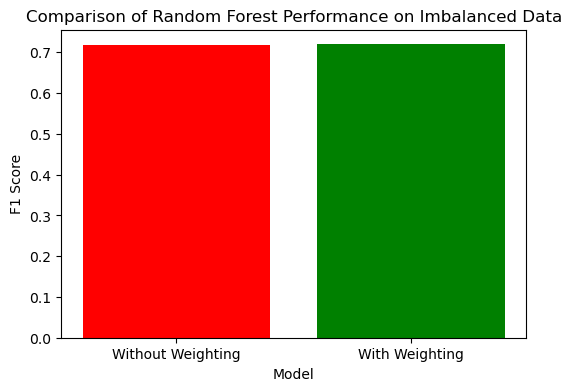

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

# Generate an imbalanced dataset
X, y = make_classification(n_samples=5000, n_features=10, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest WITHOUT class weighting
rf_no_weight = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_weight.fit(X_train, y_train)

# Predict and evaluate
y_pred_no_weight = rf_no_weight.predict(X_test)
f1_no_weight = f1_score(y_test, y_pred_no_weight)
print("F1-Score without class weighting:", f1_no_weight)
print(classification_report(y_test, y_pred_no_weight))

# Train Random Forest WITH class weighting
rf_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_weighted.fit(X_train, y_train)

# Predict and evaluate with weighting
y_pred_weighted = rf_weighted.predict(X_test)
f1_weighted = f1_score(y_test, y_pred_weighted)
print("\nF1-Score with class weighting:", f1_weighted)
print(classification_report(y_test, y_pred_weighted))

# Compare results
labels = ["Without Weighting", "With Weighting"]
f1_scores = [f1_no_weight, f1_weighted]

plt.figure(figsize=(6, 4))
plt.bar(labels, f1_scores, color=['red', 'green'])
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Comparison of Random Forest Performance on Imbalanced Data")
plt.show()


Q29 Train an AdaBoost Classifier and analyze the effect of different learning rates

Learning Rate: 0.01 -> Accuracy: 0.9386
Learning Rate: 0.11 -> Accuracy: 0.9561
Learning Rate: 0.22 -> Accuracy: 0.9561
Learning Rate: 0.32 -> Accuracy: 0.9561
Learning Rate: 0.43 -> Accuracy: 0.9561
Learning Rate: 0.53 -> Accuracy: 0.9561
Learning Rate: 0.64 -> Accuracy: 0.9561
Learning Rate: 0.74 -> Accuracy: 0.9561
Learning Rate: 0.85 -> Accuracy: 0.9561
Learning Rate: 0.95 -> Accuracy: 0.9561
Learning Rate: 1.06 -> Accuracy: 0.9649
Learning Rate: 1.16 -> Accuracy: 0.9561
Learning Rate: 1.27 -> Accuracy: 0.9561
Learning Rate: 1.37 -> Accuracy: 0.9474
Learning Rate: 1.48 -> Accuracy: 0.9561
Learning Rate: 1.58 -> Accuracy: 0.9649
Learning Rate: 1.69 -> Accuracy: 0.9561
Learning Rate: 1.79 -> Accuracy: 0.9561
Learning Rate: 1.90 -> Accuracy: 0.9298
Learning Rate: 2.00 -> Accuracy: 0.7632


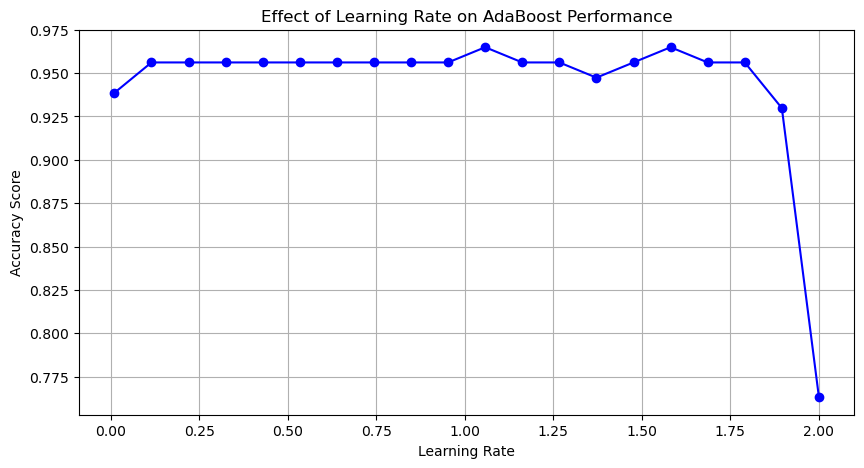

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define different learning rates
learning_rates = np.linspace(0.01, 2.0, 20)  # 20 values from 0.01 to 2.0
accuracy_scores = []

# Train and evaluate AdaBoost for different learning rates
for lr in learning_rates:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),  # FIXED `estimator`
                               n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"Learning Rate: {lr:.2f} -> Accuracy: {acc:.4f}")

# Plot Learning Rate vs Accuracy
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy Score")
plt.title("Effect of Learning Rate on AdaBoost Performance")
plt.grid(True)
plt.show()


Q30 Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load the Digits dataset (multi-class classification)
data = load_digits()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Gradient Boosting Classifier (alternative to XGBoost)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)

# Compute Log-Loss
logloss = log_loss(y_test, y_pred_proba)

print(f"Log-Loss: {logloss:.4f}")


Log-Loss: 0.1366
